# Topics covered in this notebook
## 1. Data Explorations
## 2. Simple linear regression
## 3. Hand calculations to verify the results from the summary tables
## 4. Visualization - Model fitting results
## 5. Model Diagnostic
## 6. Model improvement
## 7. Summary

In [1]:
import statsmodels.api as sm
from sklearn import datasets

In [2]:
# Prepare the dataset
data = datasets.load_boston()

In [3]:
# This Boston house price data is suitable for testing linear regression models
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd

# Define independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# Define the dependent variable
target = pd.DataFrame(data.target, columns=["MEDV"])

In [5]:
# Independent variables
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# The dependent variable
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# 1. Data Explorations
- **1.1 QQ-plot**
- **1.2 Density plot**

In [7]:
df.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [8]:
target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## 1.1 QQ-plot

<Figure size 720x576 with 0 Axes>

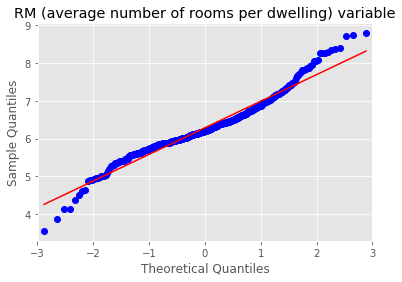

In [9]:
# Some data points were located outside the theoretical line, indicating some outliers.
# Notice that linear regression doesn't require the independent and dependent variables to be normally distributed.
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10,8))
sm.qqplot(df.RM.values, line='s')
plt.title('{} variable'.format('RM (average number of rooms per dwelling)'))
plt.show()

<Figure size 720x576 with 0 Axes>

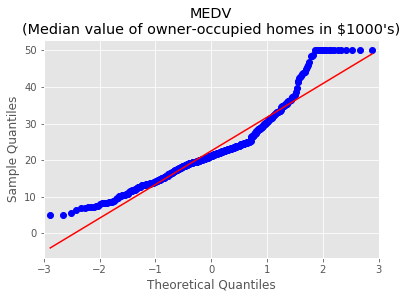

In [10]:
# Some data points were located outside the theoretical line, indicating some outliers.
plt.figure(figsize=(10,8))
sm.qqplot(target.values.flatten(), line='s')
plt.title('{}'.format("MEDV\n(Median value of owner-occupied homes in $1000's)"))
plt.show()

## 1.2 Density plot

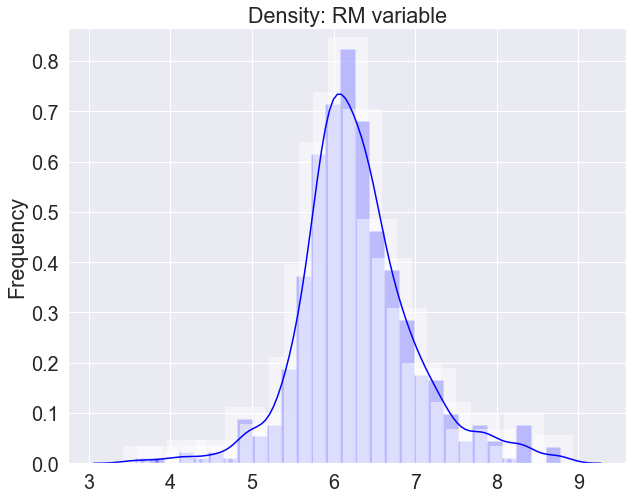

In [11]:
import seaborn as sb
sb.set(rc = {'figure.figsize': (10,8)}, font_scale = 1.8)
ax = sb.distplot(df.RM.values, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Density: {} variable'.format('RM'), ylabel = 'Frequency')
plt.show()

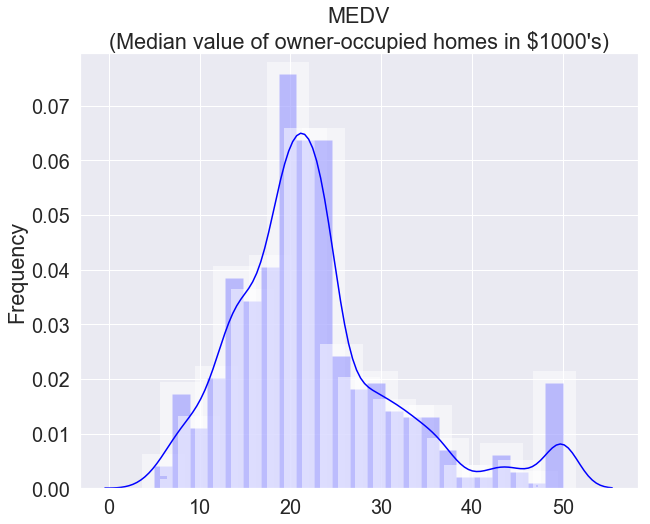

In [12]:
# Some data points located at the right tail are some outliers
sb.set(rc = {'figure.figsize': (10,8)}, font_scale = 1.8)
ax = sb.distplot(target.values.flatten(), kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = "MEDV\n(Median value of owner-occupied homes in $1000's)", ylabel = 'Frequency')
plt.show()

# 2. Simple linear regression
- **2.1 Fit a simple linear regression without a constant**
- **2.2 Fit a simple linear regression with a constant**

## 2.1 Fit a simple linear regression without a constant

In [13]:
# Without a constant
x = df["RM"]
y = target["MEDV"]

# OLS stands for Ordinary Least Squares
model_1 = sm.OLS(y, x).fit()

# Print out the model result
print('Model 1 MSE is {}.'.format(round(model_1.mse_resid, 4)))
model_1.summary()

Model 1 MSE is 58.5263.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          3.74e-256
Time:                        18:19:33   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2 Fit a simple linear regression with a constant

In [14]:
# Fit a simple linear regression with a constant
x = df["RM"]
y = target["MEDV"] 
x = sm.add_constant(x) 

model_2 = sm.OLS(y, x).fit()
predictions = model_2.predict(x)

print('Model 2 MSE is {}.'.format(round(model_2.mse_resid, 4)))
model_2.summary()

Model 2 MSE is 43.7736.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        18:19:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Hand calculations to verify the results from the summary tables
## 3.1 Tabel I
- **3.1.1 R-squared**
- **3.1.2 Adj. R-squared**
- **3.1.3 F-statistic**
- **3.1.4 Prob (F-statistic)**
- **3.1.5 Log-likelihood**
- **3.1.6 AIC**
- **3.1.7 BIC**

## 3.2 Table II
- **3.2.1 Coefficient estimations**
- **3.2.2 Standard Error of estimators**
- **3.2.3 95% confidence interval of coefficients**

## 3.1 Table I

### 3.1.1 R-squared
   - R-squared (ranged from 0 to 1) indicates how much variance is explained by the model.
   - Notice: The R-squared is always higher as we include more independent variables. We might prefer using adjusted R-squared since it considers number of independent variables as the normalizer. 

$$ R^2 = \frac {\sum_{i=1}^{n} (\hat{y_i} - \bar{y})^2} {\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

$$ or $$

$$ R^2 = cor(X,Y)^2 $$

In [15]:
# Formula 1
numerator = sum((predictions - np.mean(target.MEDV)) ** 2)
denominator = sum((target.MEDV - np.mean(target.MEDV)) ** 2)
r_squared = numerator/denominator
print('R-squared is {}.'.format(
    round(r_squared,3))
     )

R-squared is 0.484.


In [16]:
# Formula 2 (only works when fitting a simple linear regression)
print('R-squared is {}.'.format(
    round(np.corrcoef(x = df.RM, y = target.MEDV)[0][1] ** 2,3))
     )

R-squared is 0.484.


### 3.1.2 Adj. R-squared
   - Notice: Use the number of independent variables as a normalizer. The adjusted R-squared is always lower than the R-squared.

$$ R_{adj}^2 = 1 - (\frac {n-1} {n-p-1})*(1-R^2)$$

In [18]:
adj_r_squared = 1 - ((len(target) - 1) / (len(target) - 1 - 1) * (1 - r_squared))
print('Adj. R-squared is {}.'.format(
    round(adj_r_squared,3))
     )

Adj. R-squared is 0.483.


### 3.1.3 F-statistic
   - F test: Perform a null hypothesis that the coefficients are 0, meaning that coefficients are not good indicators in a linear regression model.

$$ H_0: \beta_1 = \beta_2 = ... = \beta_p = 0 $$

$$ H_1: \beta_1 = \beta_2 = ... = \beta_p \neq 0 $$

$$ F = \frac {\frac {\sum_{i=1}^{n} (\hat{y_i} - \bar{y})^2} {p}} 
{\frac {\sum_{i=1}^{n} ({y_i} - \hat{y_i})^2} {n-p-1}}  $$

In [19]:
# Numerator: the variance explained by the model
# Denominator: residuals
numerator = sum((predictions - np.mean(target.MEDV)) ** 2) / 1
denominator = sum((target.MEDV.values - predictions) ** 2) / (len(target) - 1 - 1)
F = numerator/denominator
print('F-statistic is {}.'.format(round(F,1)))

F-statistic is 471.8.


### 3.1.4 Prob (F-statistic)

In [20]:
# It's a two-tailed F-test, that's why multiply the p-value by 2
from scipy.stats import f
prob_f = (1 - f.cdf(x = F, dfn = 1, dfd = (len(target) - 1 - 1), loc=0, scale=1))*2
print('Prob (F-statistic) is {}.'.format(
    round(prob_f, 4)))

alpha_level = 0.05
if prob_f < alpha_level:
    print('Reject H0.')
else:
    print('Do not reject H0.')

Prob (F-statistic) is 0.0.
Reject H0.


### 3.1.5 Log-Likelihood
   - The goal of a linear regression is to find the maximum log-likelihood.

$$ f(x) = \frac {1} {\sqrt{2*\pi*\sigma^2}} * e^{- \frac {(y_i-(b_0+b_1x_i))^2} {2\sigma^2}} $$

$$ L(f(x)) = L(\frac {1} {\sqrt{2*\pi*\sigma^2}} * e^{- \frac {(x-\mu)^2} {2\sigma^2}}) $$

In [21]:
def log_likelihood(x):
    result = 0
    squared_sigma = sum((predictions - target.MEDV) ** 2) / (len(target.MEDV) - 2)
    left = 1/(np.sqrt(2*np.pi*squared_sigma))
    
    for i in range(len(target.MEDV)):
        right = ((target.MEDV[i] - predictions[i]) ** 2) / (2*squared_sigma)
        final = np.log(left * np.exp(-right))
        result += final
        
    return result

In [22]:
print('log_likelihood is {}.'.format(
    round(
        log_likelihood(x = df.RM.values), 1)
))

log_likelihood is -1673.1.


### 3.1.6 AIC
   - The lower the AIC is, the better the model. AIC also considers the number of parameters.

$$AIC = 2K - 2L$$

In [23]:
AIC = 2 * len(model_2.params) - log_likelihood(x = df.RM.values) * 2
print('AIC is {}.'.format(round(AIC, 0)))

AIC is 3350.0.


### 3.1.7 BIC
   - The lower the BIC is, the better the model. BIC considers the number of parameters and the number of data.

$$BIC = ln(n)K - 2ln(L)$$

In [25]:
# The lower the BIC is, the better the model
# BIC also considers the number of parameters
BIC = np.log(len(target.MEDV))*2 - log_likelihood(x = df.RM.values) * 2
print('BIC is {}.'.format(round(BIC, 0)))

BIC is 3359.0.


## 3.2 Table II

### 3.2.1 Coefficient estimations (LSE estimation)

$$ b_0 = E(Y) - b_1*E(X) $$

$$ b_1 = \frac {cov(X,Y)} {Var(X)} $$

In [26]:
# Beta 0 (or constant) estimation
def estimate_coefficient(y, x):
    covariance_x_y = np.cov(x, y)
    beta_1 = covariance_x_y[0][1] / covariance_x_y[0][0]
    constant = np.mean(y) - beta_1*np.mean(x)
    
    return constant, beta_1

In [27]:
x = df["RM"] 
y = target["MEDV"] 
estimated_constant, estimated_beta_1 = estimate_coefficient(y = y, x = x)

In [28]:
print('The estimated coefficients of constant and RM are {} and {} separately.'.format(
    round(estimated_constant,4), round(estimated_beta_1,4)))

The estimated coefficients of constant and RM are -34.6706 and 9.1021 separately.


## 3.2.2 Standard Error of estimators
- Reference: https://stats.stackexchange.com/questions/289457/proof-for-the-standard-error-of-parameters-in-linear-regression

$$ SE(\hat{b_0}) =  \sqrt{\frac {\sigma^2} {n} * (1 + \frac {\bar{x}^2} {S_X^2})} $$

In [29]:
# SE of beta 0
squared_sigma = sum((predictions - y.values) ** 2) / (len(y.values) - 2)
se_beta_zero = (squared_sigma / len(x.values) * (1 + np.mean(x.values)**2 / np.var(x.values))) ** (1/2)
print('std err of beat 0 is {}.'.format(round(se_beta_zero, 3)))

std err of beat 0 is 2.65.


$$ SE(\hat{b_1}) =  \sqrt{\frac {\sigma^2} {n*S_X^2}} $$

In [30]:
# SE of beta 1
# Notice: devide sigma by the number of observatinos minus 2 
# Why minus 2? We have two estimated parameters, beta 0 & beta 1

numerator = squared_sigma
denominator = np.var(x.values) * len(x.values)
se_beta_one = (numerator/denominator)**(1/2)
print('std err of beat 1 is {}.'.format(round(se_beta_one, 3)))

std err of beat 1 is 0.419.


## 3.2.3 95% confidence interval of coefficients

In [31]:
# 95% C.I. of the constant
from scipy.stats import t

lower_bound, upper_bound = (-34.6706 - abs(t.ppf(0.025, df = 506 - 2))*2.650, 
                            -34.6706 + abs(t.ppf(0.025, df = 506 - 2))*2.650)
print('95% C.I. of the constant is [{}, {}].'.format(round(lower_bound,3), round(upper_bound,3)))

95% C.I. of the constant is [-39.877, -29.464].


In [32]:
# 95% C.I. of the RM
lower_bound, upper_bound = (9.1021 - abs(t.ppf(0.025, df = 506 - 2))*0.419, 
                            9.1021 + abs(t.ppf(0.025, df = 505 - 2))*0.419)
print('95% C.I. of the RM is [{}, {}].'.format(round(lower_bound,3), round(upper_bound,3)))

95% C.I. of the RM is [8.279, 9.925].


# 4. Visualization - Model fitting results
- **4.1 Predicted VS Actual values given the RM variable**
- **4.2 Residual plot**

## 4.1 Predicted VS Actual values given the RM variable
- Helps us inspect whether there is a linear relationship between our variables.

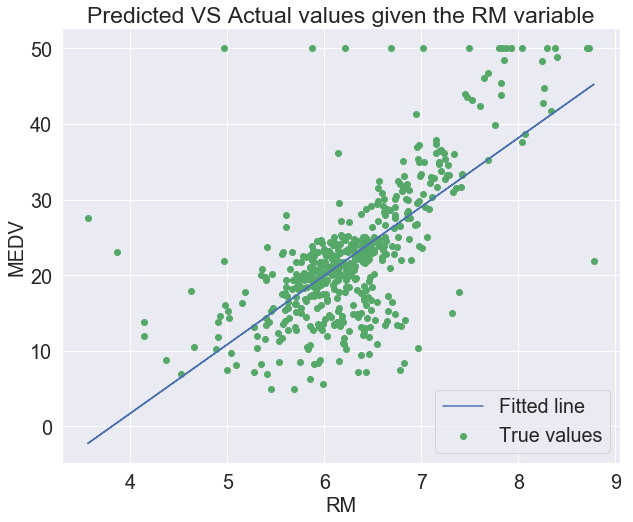

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(x.values, y.values, c = 'g')
plt.plot(x.values, predictions, c = 'b')
plt.xlabel('RM', fontsize = 20)
plt.ylabel('MEDV', fontsize = 20)
plt.title('Predicted VS Actual values given the RM variable', fontsize = 23)
plt.legend(['Fitted line', 'True values'])

## 4.2 Residual plot
- The ideal scenario for a linear regression is that dots should be scattered randomly and evenly across the 0 horizontal line.

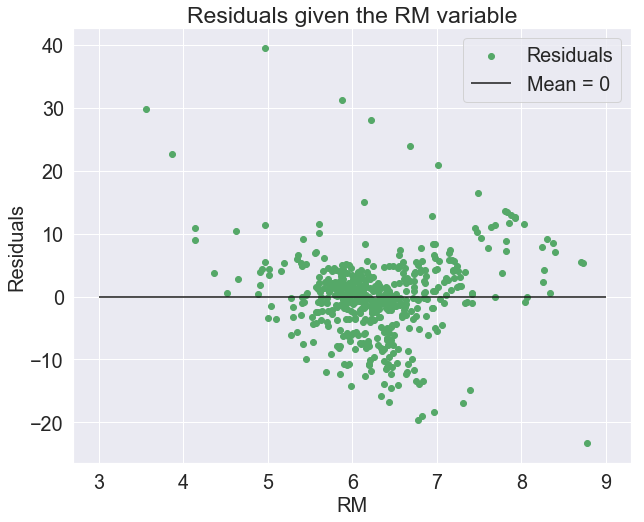

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x.values, y.values - predictions, c = 'g')
plt.hlines(y = 0, xmin = 3, xmax = 9)
plt.xlabel('RM', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Residuals given the RM variable', fontsize = 23)
plt.legend(['Residuals', 'Mean = 0'])

# 5. Model Diagnostic
- **5.1 Figure I: Residual plot**
- **5.2 Figure II: QQ plot**
- **5.3 Scale-Location Plot**
- **5.4 Cook's Distance**

# Addition Note
Reference: http://people.duke.edu/~rnau/testing.htm

Reference: http://www.statsmodels.org/stable/diagnostic.html

## (1) Four important assumptions in linear regression
#### (I.) Linearity and Additivity of the relationship between dependent and independent variables
#### (II.) Statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)
#### (III.) Homoscedasticity (constant variance) of the errors
#### (IV.) Normality of the error distribution

## (2) Violations of assumptions
#### (I.) Linearity and Additivity
- Diagnose: A plot of observed versus predicted values or a plot of residuals versus predicted values.
- Fix
    - (1) Applying a nonlinear transformation to the dependent and/or independent variables if a transformation that seems appropriate.
    - (2) Adding another regressor that is a nonlinear function of one of the other variables. (E.g. $X^2 + X $)
    - (3) Have overlooked some entirely different independent variables.

#### (II.) Independence
- Diagonse: Residual time series plot (residuals vs. row number).
- Fix (When minor cases of positive serial correlation)
    - (1) Adding lags of the dependent variable and/or lags of some of the independent variables.
    - (2) ARIMA regressor

#### (III.) Homoscedasticity
- Diagnose: A plot of residuals versus predicted values.
- Fix
    - (1) Log transformation
    
#### (IV.) Normality
- Diagonse: Normal quantile plot of residuals. Or, statistical testings (Kolmogorov-Smirnov test, the Shapiro-Wilk test, the Jarque-Bera test, and the Anderson-Darling test).
- Fix
    - (1) Non-linear transformation
    - (2) Separate models should be built (when two or more subsets of the data having different statistical properties) or else some data should merely be excluded, provided that there is some a priori criterion that can be applied to make this determination.
    - (3) Outlier detection.

In [35]:
# Calculations required for later visualizations

# Predictions
model_fitted_y = model_2.fittedvalues

# Residuals
model_residuals = model_2.resid

# Normalized residuals
model_norm_residuals = model_2.get_influence().resid_studentized_internal

# Absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Absolute residuals
model_abs_resid = np.abs(model_residuals)

# Leverage, from statsmodels internals
model_leverage = model_2.get_influence().hat_matrix_diag

# Cook's distance, from statsmodels internals
model_cooks = model_2.get_influence().cooks_distance[0]

## 5.1 Figure I: Residual plot
- **For checking assumption I: Linearity and Additivity**
- **For checking assumption III: Homoscedasticity**
    - We might expect the line to be more horizontal, and the data points scattered more randomly and evenly given different fitted values. 

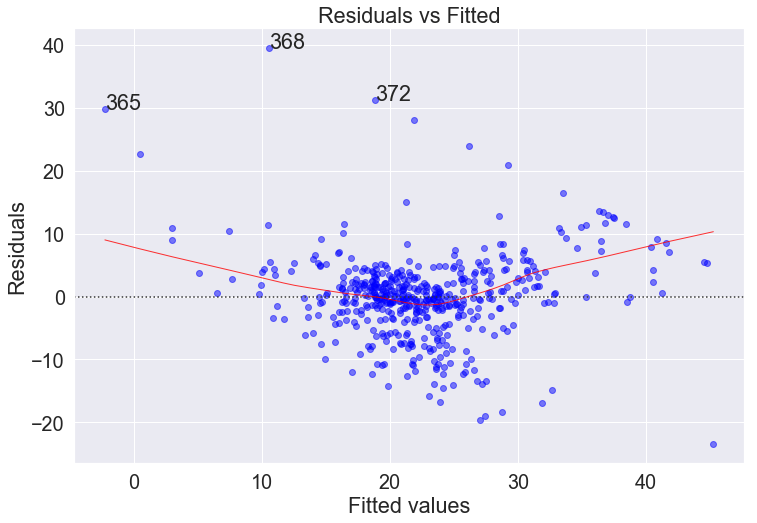

In [36]:
import seaborn as sb
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sb.residplot(model_fitted_y, 'MEDV', data=target, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

## 5.2 Figure II: QQ plot
- **For checking assumption IV: Normality**
    - The foundation assumption of a linear regression. QQ plot shows how well the distribution of residuals fit the normal distribution. A good fit should be data points are located on the line.

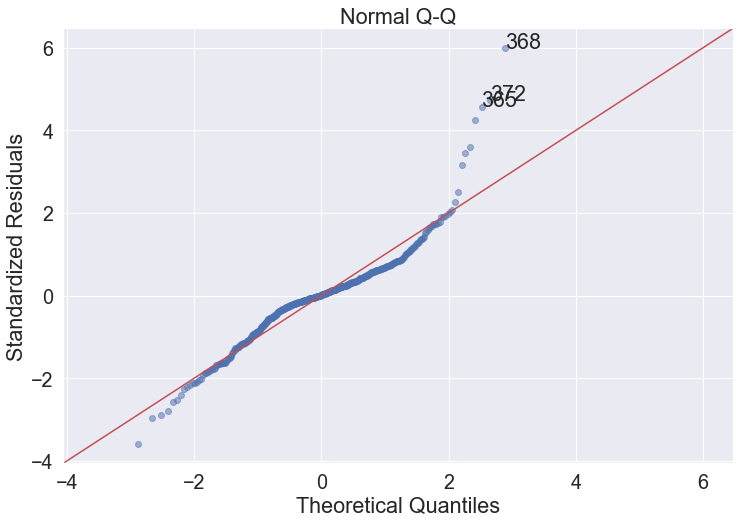

In [37]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

# xy: location of a point
# specify locations of points from the largest to smallest 
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [38]:
# Do the residuals follow a normal distribution?
# Normality assumption testing
from scipy.stats import shapiro

def perform_shapiro_test(data, alpha_threshold):
    '''
    Perform Shapiro-Wilk Test on normality.
    If p value is less than the threshold (alpha_threshold) value, then we reject the H0 (null hypothesis),
    indicating that the data does not follow a normal distribution.
    
    data: sample data
    alpha_threshold: an alpha level to compare with the p-value
    '''
    
    stat, p = shapiro(data)
    
    if p > alpha_threshold:
        print('Sample looks Gaussian (fail to reject H0).')
        print('Test statistic is {}.'.format(round(stat,4)))
        print('The corresponding p-value is {}.'.format(round(p,4)))
    else:
        print('Sample does not look Gaussian (reject H0).')
        print('Test statistic is {}.'.format(round(stat,4)))
        print('The corresponding p-value is {}.'.format(round(p,4)))

perform_shapiro_test(data = model_norm_residuals, alpha_threshold = 0.05)

Sample does not look Gaussian (reject H0).
Test statistic is 0.9199.
The corresponding p-value is 0.0.


In [39]:
from scipy.stats import anderson
anderson(model_norm_residuals, dist = 'norm')

AndersonResult(statistic=9.622995096897967, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## 5.3 Figure III: Scale-Location Plot
- Very similar to the Figure I. The only differenc is that the y-axis are square root of standardized residuals.

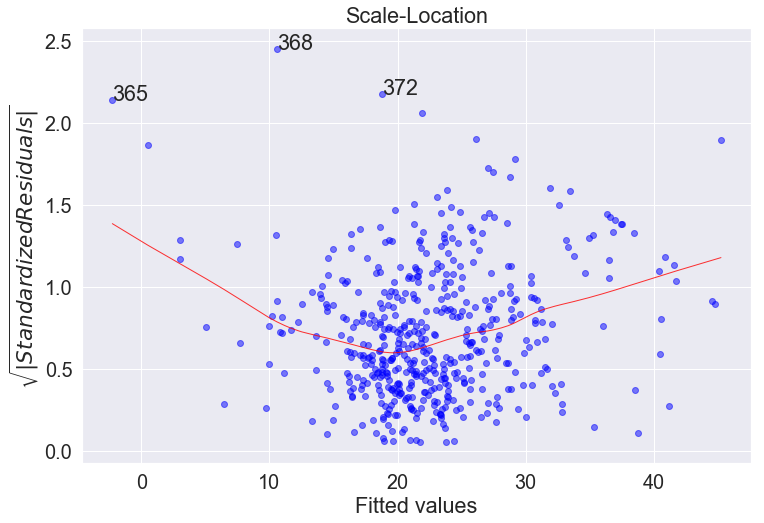

In [40]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5, color = 'blue')
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

## 5.4 Figure IV: Cook's Distance
- Cook's Distance helps us to inspect the influential points.
- **The general rule is data points have cook's distance larger than 0.5 could be considered to be influential.**
    - Reference: https://onlinecourses.science.psu.edu/stat501/node/340/

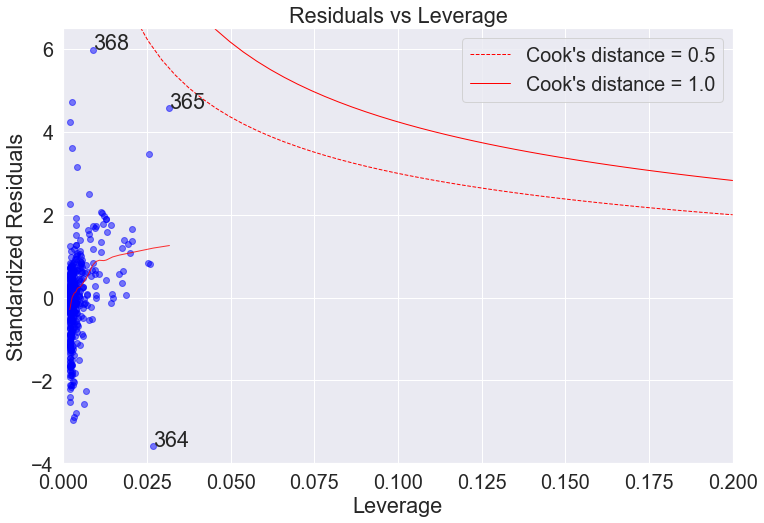

In [48]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5, color = 'blue')
sb.regplot(model_leverage, model_norm_residuals, 
           scatter=False, 
           ci=False, 
           lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-4, 6.5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, plot_line=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=plot_line, color='red')

p = len(model_2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      "Cook's distance = 0.5", plot_line ='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50),
      "Cook's distance = 1.0", plot_line ='-') # 1 line

plt.legend(loc='upper right')

In [49]:
# The maximum cook distance is 0.3424
sum(model_cooks > 0.3), max(model_cooks)

(1, 0.34235011402323895)

## 5.5 Other figures
- **For checking assumption II: Independence**
- The ideal scenario is that residuals should scattered evenly in a certain fixed range. There should not be a (positive/negative) trend line occurred, such that the previous record didn't affect the outcome for the next record.

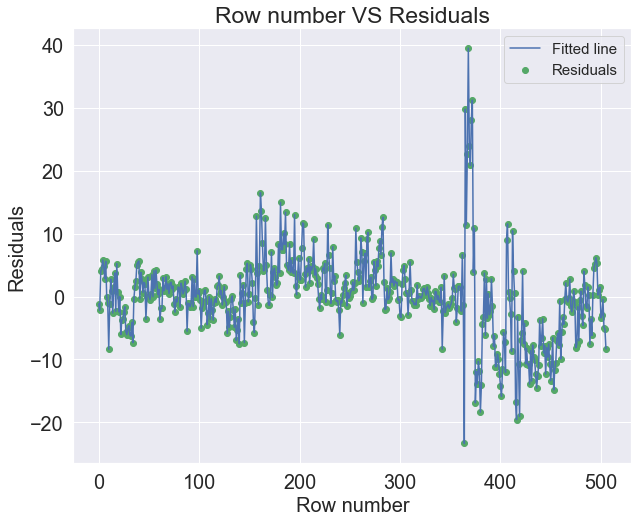

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(df.index, model_residuals, c = 'g')
plt.plot(df.index, model_residuals, c = 'b')
plt.xlabel('Row number', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Row number VS Residuals', fontsize = 23)
plt.legend(['Fitted line', 'Residuals'], fontsize = 15)

In [51]:
# The closer to 0 the statistic, the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_residuals)

0.6836205718401291

# 6. Model improvement
- **6.1 Boxcox transformation**
- **6.2 Using Leverages to identify extreme x values**
- **6.3 Identifying Outliers**
    - 6.3.1 Studentized residuals
    - 6.3.2 Difference in Fits (DFFITS)
    - 6.3.3 Mean imputation
    - 6.3.4 Median imputation
    - 6.3.5 Capping imputation
- **6.4 Majority Voting**

## 6.1 Boxcox transformation
- Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

$$ y = \frac {x^\lambda - 1} {\lambda}, \lambda > 0 $$ 

$$ y = log(x), \lambda = 0 $$

In [52]:
from scipy.stats import boxcox
boxcox(df['RM'].values)[0][:5], boxcox(df['RM'].values)[1]

(array([2.96056795, 2.90565749, 3.17138541, 3.10784332, 3.15854756]),
 0.44895976107977725)

In [53]:
# Hand calculations to verify the results (take first five as examples)
# lambda is '0.44895976107977725' returned by the function
(df.RM.values[:5] ** (0.44895976107977725) - 1) / 0.44895976107977725

array([2.96056795, 2.90565749, 3.17138541, 3.10784332, 3.15854756])

<Figure size 720x576 with 0 Axes>

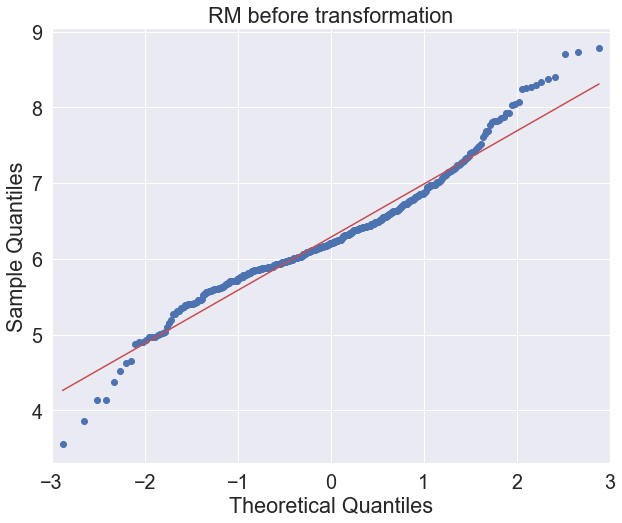

In [54]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(10,8))
qqplot(x.values, line='s')
plt.title('{} before transformation'.format(x.name))
plt.show()

<Figure size 720x576 with 0 Axes>

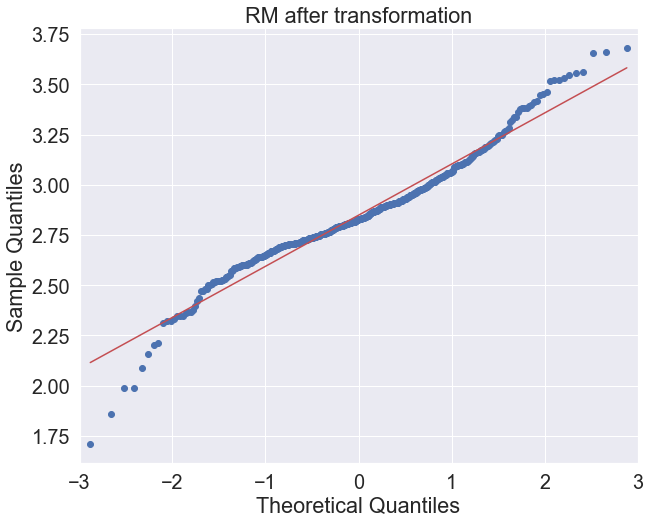

In [55]:
plt.figure(figsize=(10,8))
qqplot(boxcox(x.values)[0], line='s')
plt.title('{} after transformation'.format(x.name))
plt.show()

In [56]:
# Refit a simple linear regression with transformed data
transformed_x = boxcox(df["RM"].values)[0]
y = target["MEDV"] 
coefficients = sm.add_constant(transformed_x) 

model_3 = sm.OLS(y, coefficients).fit()

# Print out the statistics
print('Model 3 MSE is {}.'.format(round(model_3.mse_resid, 4)))
model_3.summary()

Model 3 MSE is 45.8399.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     427.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.85e-69
Time:                        18:30:57   Log-Likelihood:                -1684.7
No. Observations:                 506   AIC:                             3373.
Df Residuals:                     504   BIC:                             3382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.1604      3.383    -13.942      0.000     -53.806     -40.514
x1            24.4657      1.183     20.685      0.000      22.142      26.790
==============================================================================
Omnibus:                      109.909   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.148
Skew:                           0.827   Prob(JB):                    7.09e-129
Kurtosis:                       8.025   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.2 Using Leverages to identify extreme x values

### Leverage - formula
- Reference: https://onlinecourses.science.psu.edu/stat501/node/338/

$$ \bar{h} = \frac {\sum_{i=1}^{n} h_{ii}} {n} = \frac {p} {n}$$

$$ h_{ii} > 3*(\frac{p}{n}) $$

### Leverage - important properties
(1) The leverage hii is a measure of the distance between the x value for the ith data point and the mean of the x values for all n data points.

(2) The leverage hii is a number between 0 and 1, inclusive.

(3) The sum of the hii equals p, the number of parameters (regression coefficients including the intercept).

In [57]:
# Leverage property III: The sum equals to the number of parameters
sum(model_leverage)

2.000000000000001

In [58]:
# Leverage diagnostic: Identifying data points whose x values are extreme
threshold = (len(model_2.params) / len(target.MEDV)) * 3
print('{} points passed the leverage threshold.'.format((model_leverage < threshold).sum()))

482 points passed the leverage threshold.


In [59]:
# Refit a simple linear regression without high leverage points
print(df.RM.values[(model_leverage < threshold)].shape)

# Model fitting
x_without_high_l = df.RM.values[(model_leverage < threshold)]
y = target.MEDV[(model_leverage < threshold)]
x_without_high_l = sm.add_constant(x_without_high_l) 

model_4 = sm.OLS(y, x_without_high_l).fit()

# Print out the statistics
print('Model 4 MSE is {}.'.format(round(model_4.mse_resid, 4)))
model_4.summary()

(482,)
Model 4 MSE is 39.0311.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     354.2
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.36e-59
Time:                        18:31:06   Log-Likelihood:                -1566.0
No. Observations:                 482   AIC:                             3136.
Df Residuals:                     480   BIC:                             3144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.1184      3.202    -11.906      0.000     -44.409     -31.828
x1             9.5987      0.510     18.821      0.000       8.597      10.601
==============================================================================
Omnibus:                      106.103   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.857
Skew:                           0.722   Prob(JB):                    7.57e-175
Kurtosis:                       9.152   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.3 Identifying Outliers

### 6.3.1 Studentized residuals 
- Reference: https://onlinecourses.science.psu.edu/stat501/node/339/

In [60]:
# Remove large studentized residuals which larger than 3 (general rule)
print('{} points passed the outlier threshold.'.format(
    (abs(model_norm_residuals) < 3).sum()
))

# Refit a simple linear regression without large studentized residuals
print(df.RM.values[(abs(model_norm_residuals) < 3)].shape)

# Model fitting
x_without_large_res = df.RM.values[(abs(model_norm_residuals) < 3)]
y = target.MEDV[(abs(model_norm_residuals) < 3)]
x_without_large_res = sm.add_constant(x_without_large_res) 

model_5 = sm.OLS(y, x_without_large_res).fit()

# Print out the statistics
print('Model 5 MSE is {}.'.format(round(model_5.mse_resid, 4)))
model_5.summary()

498 points passed the outlier threshold.
(498,)
Model 5 MSE is 31.2386.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     748.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          3.80e-101
Time:                        18:31:10   Log-Likelihood:                -1562.6
No. Observations:                 498   AIC:                             3129.
Df Residuals:                     496   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.5810      2.346    -17.722      0.000     -46.191     -36.971
x1            10.1455      0.371     27.360      0.000       9.417      10.874
==============================================================================
Omnibus:                       37.385   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.343
Skew:                          -0.574   Prob(JB):                     4.30e-12
Kurtosis:                       4.098   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6.3.2 Difference in Fits (DFFITS)
- Reference: https://onlinecourses.science.psu.edu/stat501/node/340/

In [61]:
# Fit a simple linear regression with a constant
index_ls = []

for i in range(len(df["RM"])):
    all_x = df["RM"].values
    y = target["MEDV"].values 

    one_out_of_all_x = np.delete(all_x, i)
    one_out_of_all_x = sm.add_constant(one_out_of_all_x) 
    
    model_without_x = sm.OLS(np.delete(y, i), one_out_of_all_x).fit()
    prediction_without_x = model_without_x.params[0] + model_without_x.params[1]*all_x[i]
    mse_without_x = model_without_x.mse_resid
    
    
    all_x = sm.add_constant(all_x) 
    model_with_all_x = sm.OLS(y, all_x).fit()
    prediction_with_all_x = model_with_all_x.predict(all_x[i])
    mse_with_all_x = model_with_all_x.mse_resid
    
    # DFFITS calculations
    
    result = prediction_with_all_x - prediction_without_x 
    if abs(result) < 0.1546104:
        index_ls.append(i)

In [62]:
len(index_ls)

492

In [63]:
# Refitting
x = df.iloc[index_ls]['RM']
y = target.iloc[index_ls]["MEDV"] 
x = sm.add_constant(x) 

model_6 = sm.OLS(y, x).fit()

# Print out the statistics
print('Model 6 MSE is {}.'.format(round(model_6.mse_resid, 4)))
model_6.summary()

Model 6 MSE is 34.8618.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     531.2
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.65e-80
Time:                        18:31:17   Log-Likelihood:                -1570.8
No. Observations:                 492   AIC:                             3146.
Df Residuals:                     490   BIC:                             3154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.1236      2.668    -14.665      0.000     -44.366     -33.882
RM             9.7528      0.423     23.048      0.000       8.921      10.584
==============================================================================
Omnibus:                       50.754   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.826
Skew:                           0.172   Prob(JB):                     2.33e-62
Kurtosis:                       6.705   Cond. No.                         64.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Standardization on the feature values
from sklearn import preprocessing

standardized_rm = preprocessing.scale(df['RM'].values)

# Check the preprocessing result (mean must equal to 0 and std to 1)
print(standardized_rm.mean(axis = 0))
print(standardized_rm.std(axis = 0))

-1.0882818581305882e-16
0.9999999999999999


In [65]:
(abs(standardized_rm) >= 3).sum()

8

In [66]:
outlier_ls = []
for i in range(len(standardized_rm)):
    if abs(standardized_rm[i]) >= 3:
        outlier_ls.append(i)
        print(i)
        #print(standardized_rm[i])

225
257
262
364
365
367
374
406


In [67]:
print(df['RM'].values[outlier_ls])
print(df['RM'].values.mean())
print(np.median(df['RM'].values))

[8.725 8.704 8.398 8.78  3.561 3.863 4.138 4.138]
6.284634387351779
6.2085


### 6.3.3 & 6.3.4 Mean / Median imputation

In [68]:
mean_imputation = df.RM
mean_imputation = mean_imputation.replace([8.725, 8.704, 8.398, 8.78 , 3.561, 3.863, 4.138, 4.138],
                        df['RM'].values.mean())

median_imputation = df.RM
median_imputation = median_imputation.replace([8.725, 8.704, 8.398, 8.78 , 3.561, 3.863, 4.138, 4.138], 
                                              np.median(df['RM'].values))

### 6.3.5 Capping imputation

In [69]:
IQR = df.RM.quantile(q = [0.25, 0.75])[0.75] - df.RM.quantile(q = [0.25, 0.75])[0.25]
upper_threshold = 1.5*IQR + df.RM.quantile(q = [0.25, 0.75])[0.75]
lower_threshold = df.RM.quantile(q = [0.25, 0.75])[0.25] - 1.5*IQR
print(lower_threshold, upper_threshold)
print((df.RM.values <= lower_threshold).sum(), (df.RM.values >= upper_threshold).sum())


capping_imputation = df.RM
capping_imputation = capping_imputation.replace(
    capping_imputation[capping_imputation >= upper_threshold],
    upper_threshold)
capping_imputation = capping_imputation.replace(
    capping_imputation[capping_imputation <= lower_threshold],
    lower_threshold)
print(capping_imputation.describe())

4.778500000000001 7.730499999999999
8 22
count    506.000000
mean       6.275312
std        0.630242
min        4.778500
25%        5.885500
50%        6.208500
75%        6.623500
max        7.730500
Name: RM, dtype: float64


In [70]:
# Mean imputation
y = target['MEDV'].values
mean_imputation = sm.add_constant(mean_imputation) 
    
model_7 = sm.OLS(y, mean_imputation).fit()

print('Model 7 MSE is {}.'.format(round(model_7.mse_resid, 4)))
model_7.summary()

Model 7 MSE is 43.7377.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     472.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.02e-74
Time:                        18:31:28   Log-Likelihood:                -1672.9
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.6843      2.923    -13.920      0.000     -46.426     -34.942
RM            10.0591      0.463     21.740      0.000       9.150      10.968
==============================================================================
Omnibus:                      124.006   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.420
Skew:                           0.901   Prob(JB):                    7.63e-171
Kurtosis:                       8.823   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Median imputation
y = target['MEDV'].values
median_imputation = sm.add_constant(median_imputation) 
    
model_8 = sm.OLS(y, median_imputation).fit()

print('Model 8 MSE is {}.'.format(round(model_8.mse_resid, 4)))
model_8.summary()

Model 8 MSE is 43.9494.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.84e-74
Time:                        18:31:31   Log-Likelihood:                -1674.1
No. Observations:                 506   AIC:                             3352.
Df Residuals:                     504   BIC:                             3361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.5019      2.929    -13.829      0.000     -46.256     -34.748
RM            10.0320      0.464     21.632      0.000       9.121      10.943
==============================================================================
Omnibus:                      127.288   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.368
Skew:                           0.928   Prob(JB):                    1.77e-176
Kurtosis:                       8.911   Cond. No.                         64.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Capping imputation
y = target['MEDV'].values
capping_imputation = sm.add_constant(capping_imputation) 
    
model_9 = sm.OLS(y, capping_imputation).fit()

print('Model 9 MSE is {}.'.format(round(model_9.mse_resid, 4)))
model_9.summary()

Model 9 MSE is 43.0199.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     488.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.10e-76
Time:                        18:31:33   Log-Likelihood:                -1668.7
No. Observations:                 506   AIC:                             3341.
Df Residuals:                     504   BIC:                             3350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7279      2.921    -14.287      0.000     -47.466     -35.990
RM            10.2402      0.463     22.112      0.000       9.330      11.150
==============================================================================
Omnibus:                       92.915   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.829
Skew:                           0.640   Prob(JB):                    6.66e-120
Kurtosis:                       7.939   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.4 Majority Voting

In [73]:
# Leverage result
for i in range(len(model_leverage)):
    if model_leverage[i] > threshold:
        print(i)

97
163
166
195
204
224
225
226
232
233
253
257
262
267
283
364
365
367
374
384
386
406
412
414


In [74]:
# Outlier result
for i in range(len(model_norm_residuals)):
    if abs(model_norm_residuals[i]) > 3:
        print(i)

364
365
367
368
369
370
371
372


In [75]:
# Cook's distance
for i in range(len(model_cooks)):
    if model_cooks[i] > 0.3:
        print(i)

365


In [76]:
# Remove 365th data point 
# (as 365th data point has high leverage, studentized residual, and the maximum cook's distance)
all_x = df['RM'].values
y = target['MEDV'].values

without_365_x = np.delete(all_x, 365)
without_365_x = sm.add_constant(without_365_x) 
    
model_10 = sm.OLS(np.delete(y, 365), without_365_x).fit()

print('Model 10 MSE is {}.'.format(round(model_10.mse_resid, 4)))
model_10.summary()

Model 10 MSE is 42.0424.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     512.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           9.32e-79
Time:                        18:31:38   Log-Likelihood:                -1659.6
No. Observations:                 505   AIC:                             3323.
Df Residuals:                     503   BIC:                             3332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8415      2.638    -13.964      0.000     -42.025     -31.658
x1             9.4379      0.417     22.637      0.000       8.619      10.257
==============================================================================
Omnibus:                       92.094   Durbin-Watson:                   0.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.898
Skew:                           0.594   Prob(JB):                    6.02e-133
Kurtosis:                       8.247   Cond. No.                         59.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Remove 364, 365, 367th data points 
# (as they didn't pass two thresholds above)
all_x = df['RM'].values
y = target['MEDV'].values

without_three_x = np.delete(all_x, [364, 365, 367])
without_three_x = sm.add_constant(without_three_x) 
    
model_11 = sm.OLS(np.delete(y, [364, 365, 367]), without_three_x).fit()

print('Model 11 MSE is {}.'.format(round(model_11.mse_resid, 4)))
model_11.summary()

Model 11 MSE is 39.829.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     570.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.88e-85
Time:                        18:31:42   Log-Likelihood:                -1639.4
No. Observations:                 503   AIC:                             3283.
Df Residuals:                     501   BIC:                             3291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.0445      2.634    -15.204      0.000     -45.219     -34.870
x1             9.9473      0.416     23.893      0.000       9.129      10.765
==============================================================================
Omnibus:                       99.428   Durbin-Watson:                   0.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.750
Skew:                           0.643   Prob(JB):                    5.60e-154
Kurtosis:                       8.659   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Remove data points according to the plot results
all_x = df['RM'].values
y = target['MEDV'].values

without_four_x = np.delete(all_x, [364, 365, 368, 372])
without_four_x = sm.add_constant(without_four_x) 
    
model_12 = sm.OLS(np.delete(y, [364, 365, 368, 372]), without_four_x).fit()

print('Model 12 MSE is {}.'.format(round(model_12.mse_resid, 4)))
model_12.summary()

Model 12 MSE is 35.8258.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     649.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.03e-92
Time:                        18:31:44   Log-Likelihood:                -1609.6
No. Observations:                 502   AIC:                             3223.
Df Residuals:                     500   BIC:                             3232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.3182      2.476    -16.281      0.000     -45.183     -35.453
x1             9.9758      0.391     25.482      0.000       9.207      10.745
==============================================================================
Omnibus:                       33.899   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.798
Skew:                           0.022   Prob(JB):                     3.96e-29
Kurtosis:                       5.500   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.5 Other transformations

In [79]:
# f(x) = x^2 + x
x = (df['RM'].values ** 2) + df['RM'].values
x = sm.add_constant(x)
y = (target['MEDV'].values)  
 
model_13 = sm.OLS(y, x).fit()

print('Model 13 MSE is {}.'.format(round(model_13.mse_resid, 4)))
model_13.summary()

Model 13 MSE is 41.2084.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     532.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.94e-81
Time:                        18:31:47   Log-Likelihood:                -1657.8
No. Observations:                 506   AIC:                             3320.
Df Residuals:                     504   BIC:                             3328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6637      1.382     -6.271      0.000     -11.378      -5.949
x1             0.6742      0.029     23.078      0.000       0.617       0.732
==============================================================================
Omnibus:                       93.902   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.162
Skew:                           0.577   Prob(JB):                    7.42e-149
Kurtosis:                       8.570   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. Summary

#### 1. It's not guarantee that the certain method always works the best among others. We should be very careful to interpret the overall model results and inspect the assumptions by diagnostic plots. We can see that even though removing high studentized residuals provides the most favorable result, we can't just randomly remove these data points as they might contribute more by other independent variables they have to the model.
#### 2. Notice, at here, I didn't split the data into train and test. However, in the next notebook (multiple linear regression), I have completed a more thorough experiment. 
#### 3. The following tasks in the next notebook which is something different or new than this notebook:
   - Use all independent variables as predictors in a model.
   - Different ways of visualizations to do data explorations. 
   - Split data into train and test, and compute the metric on each of them to see whether there is an overfitting issue.
   - Combined more than one improvement method (chain two improvment methods) to see if they can increase the model performance.

| Model Number | Method | Adj. R | MSE | Rank (by MSE) |
| -- | -- | -- | -- | -- |
| 1 | Fitting without adding a constant | 0.901 | 58.5263 |
| 2 | Fitting with adding a constant | 0.483 | 43.7736 |
| 3 | Box-cox transformation on the RM variable | 0.458 | 45.8399 |
| 4 | Removed high leverage data points | 0.423 | 39.0311 |
| 5 | Removed data points containing high studentized residuals | 0.601 | 31.2386 | 1 
| 6 | Removed data points containing high DFFITS | 0.519 | 34.8618 | 2
| 7 | Outliers: Mean imputation | 0.483 | 43.7377 |
| 8 | Outliers: Median imputation | 0.480 | 43.9494 |
| 9 | Outliers: Capping imputation | 0.491 | 43.0199 |
| 10 | Majority Voting: Removed 365th data point | 0.504 | 42.0424 |
| 11 | Majority Voting: Removed 364, 365, 367th data points | 0.532 | 39.829 |
| 12 | Majority Voting: According to diagnostic plot results | 0.564 | 35.8258 | 3
| 13 | Polynomial transformation | 0.513 | 41.2084 |